# Types Of Transformation techniques

- Normalization And Standardization
- Scaling to Minimum And Maximum values
- Scaling To Median And Quantiles
- Guassian Transformation
     - Logarithmic Transformation
     - Reciprocal Trasformation
     - Square Root Transformation
     - Exponential Transformation
     - Box Cox Transformation

# Standardization (Z- score)

**We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.**

z=(x - x_mean)/std

when to use?
Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
### fit vs fit_transform
df_scaled = scaler.fit_transform(df)

# Min Max Scaling (Normalization)

**It works well in deep learning. It uses more in (CNN)---Deep Learning Techniques**

When?
Use MinMaxScaler as the default if you are transforming a feature. It's non-distorting and data are not following in normal distribution.

Min Max Scaling scales the values between 0 to 1
- X_scaled = X - X.min / (X.max - X.min)

In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax  =pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


# Robust Scaler

**It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:**

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

When?
Standardization can become skewed or biased if the input variable contains outlier values. To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as robust scaling



In [5]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


# Guassian Transformation

**Some machine learning algorithms like linear and logistic assume that the features are normally distributed. When the data doesn't follow normal distribution or data has skewedness so we can apply Guassian techniqe to scale down the data into normal distribution. -Accuracy -Performance**

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

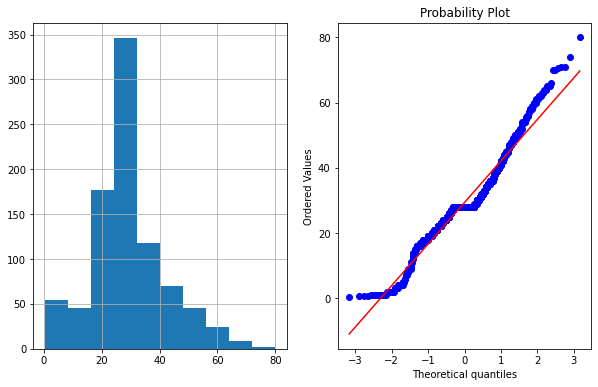

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Age']=df['Age'].fillna(df['Age'].median())
import scipy.stats as stat
import pylab


def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

plot_data(df,'Age')
# age is following guassian

# Logarithmic Transformation

**It works well when your data left or right skewed**


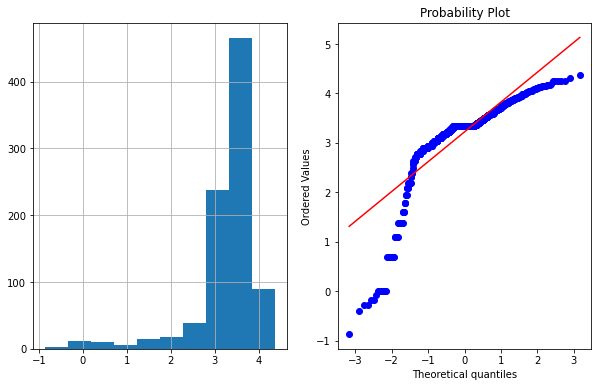

In [8]:


import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')


# Reciprocal Transformation¶

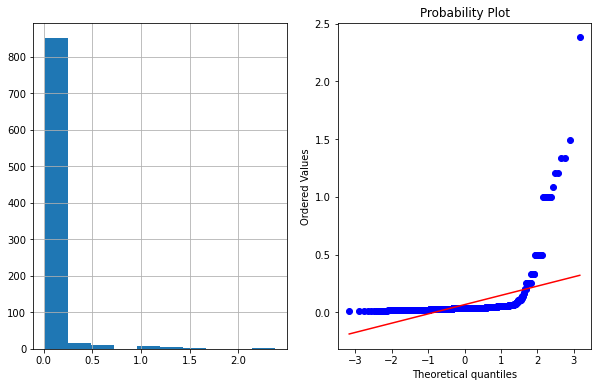

In [9]:

df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

# Square Root Transformation



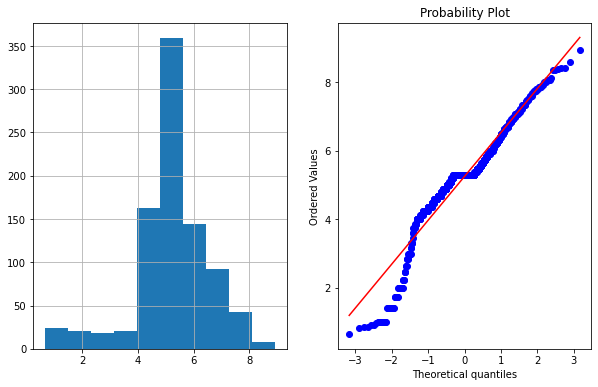

In [10]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

# Exponential Transformation



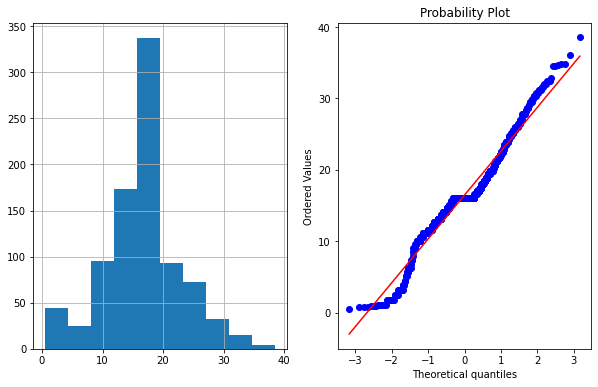

In [13]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

# BoxCox Transformation

**The Box-Cox transformation is defined as:
T(Y)=(Y exp(λ)−1)/λ
where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.**




0.7964531473656952


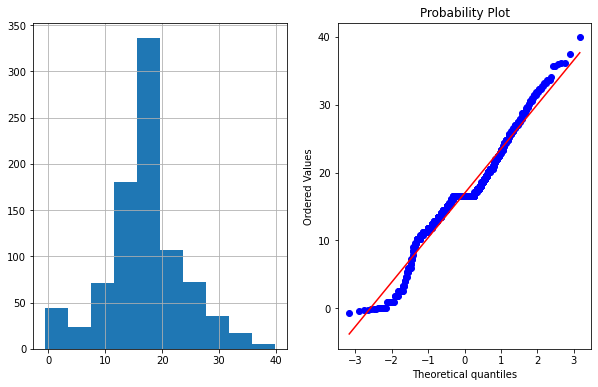

In [14]:
import scipy.stats as stat
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

print(parameters)


plot_data(df,'Age_Boxcox')